# Purpose: Notebook to generate the MPCORB files needed for astcheck to check to see if a previously discovered asteroid is at a certain location

In [11]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import os
import pickle as pkl
import tables

In [42]:
filenames = np.sort(glob.glob("/mnt/etdisk9/ztf_neos/training_examples/science/*.fits"))

In [43]:
dates = set()
for filename in filenames:
    dates.add(filename[52:60])

In [44]:
print(sorted(list(dates)))
print(len(dates))

['20180320', '20180321', '20180322', '20180325', '20180326', '20180327', '20180328', '20180329', '20180330', '20180331', '20180401', '20180402', '20180403', '20180406', '20180407', '20180408', '20180409', '20180410', '20180411', '20180413', '20180414', '20180415', '20180416', '20180417', '20180418', '20180419', '20180420', '20180421', '20180422', '20180423', '20180424', '20180425', '20180426', '20180427', '20180428', '20180429', '20180430', '20180504', '20180505', '20180506', '20180507', '20180508', '20180509', '20180510', '20180511', '20180512', '20180514', '20180516', '20180517', '20180518', '20180519', '20180520', '20180521', '20180522', '20180523', '20180524', '20180525', '20180528', '20180529', '20180530', '20180531', '20180601', '20180602', '20180603', '20180604', '20180605', '20180606', '20180607', '20180608', '20180609', '20180610', '20180611', '20180612', '20180613', '20180614', '20180615', '20180616', '20180617', '20180618', '20180619', '20180620', '20180621', '20180622', '20

In [45]:
len("/mnt/etdisk9/ztf_neos/training_examples/science/ztf_2018")

56

In [46]:
dates_list = sorted(list(dates))[::-1]

In [47]:
from tqdm.notebook import tqdm

In [ ]:
for i in tqdm(list(range(1, len(dates_list)))):
    
    date = dates_list[i]
    date_prev = dates_list[i - 1]
    
    print(date)
    
    dir1 = "/mnt/etdisk9/ztf_neos/mpcorb/" + date + "/mpcorb.dat"
    dir2 = "/mnt/etdisk9/ztf_neos/mpcorb/" + date_prev + "/mpcorb.dat"

    if not os.path.exists("/mnt/etdisk9/ztf_neos/mpcorb/" + date):
        os.mkdir("/mnt/etdisk9/ztf_neos/mpcorb/" + date)
    else:
        print("YIKES " + date + " " + str(i))
        
    subprocess.run(["../lunar/integrat", dir2, dir1, date, "-f", "lnxm13000p17000.431"], cwd="/home/fwang/integrat_asteroids")

20181229
20181228
20181224
20181223
20181222
20181221
20181220
20181219
20181217
20181216
20181215
20181214
20181213
20181212
20181210
20181209
20181205
20181204
20181203
20181129
20181128
20181127
20181126
20181125
20181121
20181120
20181119
20181118
20181117
20181116
20181115
20181114
20181113
20181112
20181111
20181110
20181109
20181108
20181107
20181106
20181105
20181104
20181103
20181102
20181101
20181031
20181009
20181008
20181006
20180929


In [80]:
import parmap

In [81]:
# for i in tqdm(list(range(0, len(dates_list)))):

def run_mpc2sof(date):
    directory = "/mnt/etdisk9/ztf_neos/mpcorb/" + date
    filepath = directory + "/mpcorb.dat"
    subprocess.run(["/home/fwang/lunar/mpc2sof", "mpcorb.dat", "/home/fwang/integrat_asteroids/ELEMENTS.COMET"], cwd=directory)
    
    
parmap.map(run_mpc2sof, dates_list, pm_pbar=True)

231it [16:03,  4.17s/it]                          


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [48]:
for i in tqdm(list(range(0, len(dates_list)))):

    date = dates_list[i]
    directory = "/mnt/etdisk9/ztf_neos/mpcorb/" + date
    subprocess.run(["cp", "/home/fwang/integrat_asteroids/ObsCodes.html", "."], cwd=directory)

In [3]:
def getObsString(position_pix, sci_file, ref_file, title):
    
    datetime = sci_file.split("/")[-1].split("_")[1]
    date = datetime[:4] + " " + datetime[4:6] + " " + datetime[6:8] + "." + datetime[8:]
    
    wcs_ref = wcs.WCS(ref_file)
    
    ra, dec = wcs_ref.all_pix2world(np.array([position_pix]), 0, ra_dec_order=True)[0]

    c = SkyCoord(ra, dec, frame="icrs", unit="deg")
    ra_str = "{:02d} {:02d} {:06.3f}".format(int(c.ra.hms.h), int(c.ra.hms.m), c.ra.hms.s)
    dec_str = "{:02d} {:02d} {:05.2f}".format(abs(int(c.dec.dms.d)), abs(int(c.dec.dms.m)), abs(c.dec.dms.s))
    
    title = "_" * (12 - len(title)) + title
    return title + " " * 3 + date + ra_str + ("+" if dec >= 0 else "-") + dec_str + " " * 21 + "I41"

In [4]:
from astropy import wcs
from astropy.coordinates import SkyCoord
size = 80
def checkObs(positions, sci_file, ref_file, thresh):
    
    datetime = sci_file.split("/")[-1].split("_")[1]
    
    date = datetime[:8]
    
    directory = "/mnt/etdisk9/ztf_neos/mpcorb/" + date + "/"

    with open(directory + "obs.txt", "w") as f:
        
        for i, position in enumerate(positions):
            f.write(getObsString(position, sci_file, ref_file, str(i)) + "\n")
    
    lines = subprocess.run(["astcheck", "obs.txt", "-r", str(thresh)], cwd=directory, capture_output=True, universal_newlines=True).stdout

    info_line = False
    
    for line in lines.split("\n"):
        if info_line:
            infos = line.split()
            if len(infos) == 7:
                print(infos)
            info_line = False
        if len(line) > 0 and line[0] == "_":
            info_line = True

In [7]:
sci_file = "/mnt/etdisk9/ztf_neos/training_examples/science/ztf_20181109418981_000509_zg_c08_o_q1_sciimg.fits"
ref_file = "/mnt/etdisk9/ztf_neos/training_examples/reference/ztf_000509_zg_c08_q1_refimg.fits"
y = 553
x = 1607

checkObs([[x, y]], sci_file, ref_file, 10)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


['19809', '-8', '-4', '9', '18.4', '0', '0']


In [9]:
sci_file = "/mnt/etdisk9/ztf_neos/training_examples/science/ztf_20180907357025_000394_zg_c03_o_q2_sciimg.fits"
ref_file = "/mnt/etdisk9/ztf_neos/training_examples/reference/ztf_000394_zg_c03_q2_refimg.fits"
y = 109.5
x = 837.5

checkObs([[x, y]], sci_file, ref_file, 10)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [114]:
with open("/home/fwang/Pipeline/filtered_indexes.pkl", "rb") as f:
    indexes = pkl.load(f)

In [115]:
# fileh = tables.open_file('/mnt/etdisk9/ztf_neos/training_examples/batches/filtered_dim_short_streaks_only.h5', mode='r')
fileh = tables.open_file('/mnt/etdisk9/ztf_neos/training_examples/batches/filtered_short_streaks_no_overlap.h5', mode='r')

train_images = fileh.root.train_images
train_labels = fileh.root.train_labels

# fileh.close()

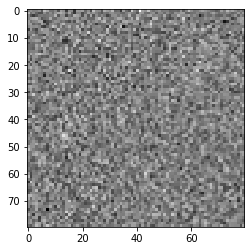

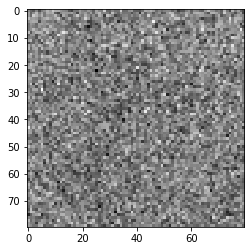

In [130]:
i = np.random.choice(np.where(~indexes)[0])
plt.imshow(train_images[i][..., 0], cmap="gray")
plt.figure()
plt.imshow(train_images[i][..., 1], cmap="gray")